# <font size="7"><b>Lotka-Volterra Competition </b></font>

An exploration of the principle of competitive exclusion using the classic Lotka-Volterra model of competition between species. 

In [2]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sm
from scipy import integrate

In [4]:
# %%javascript
# MathJax.Hub.Config({
#     TeX: { equationNumbers: { autoNumber: "AMS" } }
# })

<IPython.core.display.Javascript object>

The Lotka-Volterra model of interspecific competition explores how different factors affect the outcomes of competitive interactions, and were among the first mathematical descriptions of what later became known as the Competitive Exclusion Principle. 

The Lotka-Volterra model of interspecific competition between populations $N_1$ and $N_2$ is given by:

$$
\begin{align}
{\frac{dN_1}{dt}} = r_1N_1 \frac{(K_1-N_1 - \alpha_{12}N_2)}{K_1} \tag{1}
\end{align}
$$
$$
\begin{align}
{\frac{dN_2}{dt}} = r_2N_2 \frac{(K_2-N_2 - \alpha_{21}N1)}{K_2} \tag{2}
\end{align}
$$


Where: <br>
$r_1, r_2$ :  coefficients of population increase for N1 and N2, respectively (given by birth rate minus mortality rate); <br>
$K_1, K_2$ :  carrying capacities for N1 and N2 <br>
$\alpha_{12}, \alpha_{21}$ : competition coefficients of the effect of N2 on N1, and N1 on N2. <br>



This system of ODEs describes how the populations of competitors change over time, with logistic growth, and as a function of the competing species populaton size. To analyse the system, we will proceed through the following three steps:

<ol>
<p><li><b><font size="4">Stationary Points:</font> </b> We first obtain the set of conditions for which the system of ODEs remains constant, such that each equation is equal to zero - i.e. that N1 and N2 are not changing, and the system is in a steady state equilibrium.</li></p>

<p><li><b><font size="4">Phase Diagrams:</font> </b> We can examine the stationary points and trajectories of the solutions as vectors to obtain the <i>zero-growth isoclines*</i> (a.k.a. nullclines).</li></p>

<p><li><b><font size="4">Stabilty Analysis:</font> </b> Interpret the phase diagrams with respect to system stability. In this example, we will perform a <i>Gause-Witt isocline analysis</i>. As part of this analysis, we will examine several case studies, consisting of finding solutions to the L-V model of interspecific competition with different initial conditions.</li></p>
</ol>


* <i><b>Zero-growth isoclines</b> are the set of population sizes at which the rate of change for one population in a pair of interacting populations is zero. Thus, they give the expected equilibrium size of one population if the other is held constant.</i>


***

<font size="7"><b>1. Stationary Points</b></font>

Let's first analytically find the stationary points of equations $(1)$ and $(2)$. We start by determining the conditions whereby:

$$ {\frac{dN_1}{dt}} = r_1N_1 \frac{(K_1-N_1 - \alpha_{12}N_2)}{K_1} = 0 $$

$$ {\frac{dN_2}{dt}} = r_2N_2 \frac{(K_2-N_2 - \alpha_{21}N_1)}{K_2} = 0 $$

> <font size="3">For equation 1</font>:

$ r_1N_1 \frac{(K_1-N_1 - \alpha_{12}N_2)}{K_1} = 0 $

> we can conclude that either:

$ r_1N_1 = 0 $  <font color='red'>OR</font> $\frac{(K_1-N_1 - \alpha_{12}N_2)}{K_1} = 0 $

> Since $r_1$ and $K_2$ are both fixed positive coefficients we can say the first equilibrium population size is:

$ N_1 = 0 $  <font color='red'>OR</font> ($K_1-N_1 - \alpha_{12}N_2) = 0 $

> <font size="3">Similarly, for equation 2</font>:

$ N_2 = 0 $  <font color='red'>OR</font> ($K_2-N_2 - \alpha_{21}N_1) = 0 $

<hr style="border:2px solid gray"> </hr>

From the above conditions, we can derive the following stationary points (SP1 to SP4):

<font color="red">SP1</font> $ = (N_1=0, N_2=0) = (0,0) $
> SP1 interpretation - both species are extinct locally. </br>

$ SP2 = (N_1=0, K_2−N_2−\alpha_{21}N_1 = 0) $ </br>
$ SP2 = (0, K_2−N_2−\alpha_{21}(0)=0) = (0, K_2−N_2=0) $ </br>
<font color="red">SP2</font> $ = (0, K_2) $ 
> SP2 interpretation - N2 survives and reaches carrying capacity, N1 is extinct locally. </br>

$ SP3 = (K_1−N_1−\alpha_{12}N_2=0,N_2=0) $</br>
$ SP3 = (K_1−N_1−\alpha_{12}(0)=0)=(K_1−N_1=0,0) $</br>
<font color="red">SP3</font> $ = (K_1, 0) $
> SP3 interpretation - N1 survives and reaches carrying capacity, N2 is extinct locally. </br>

$ SP4 = (K_1−N_1−\alpha_{12}N_2=0, K_2−N_2−\alpha_{21}N_1=0) $</br>
$ SP4 = (N_1=K_1−\alpha_{12}N_2, N_2=K_2−\alpha_{21}N_1) $

At this point, some further manipulation is required to solve for $N_1$ and $N_2$: </br>
$ N_1=K_1−\alpha_{12}[K_2−\alpha_{21}N_1] $ </br>
$ N_1=K_1−\alpha_{12}K_2+\alpha_{12}\alpha_{21}N_1 $ </br>
$ N_1−\alpha_{12}\alpha_{21}N_1=K_1−\alpha_{12}K_2 $ </br>
$ N_1(1−\alpha_{12}\alpha_{21})=K_1−\alpha_{12}K_2 $ </br>
$ N_1=\frac{K_1−\alpha_{12}K_2}{1−\alpha_{12}\alpha_{21}} $ </br>

Following a similar method to solve for $N_2$ we get: </br>
$ N_2=\frac{K_2−\alpha_{21}K_1}{1−\alpha_{21}\alpha_{12}} $ </br>

And thus: </br>
<font color="red">SP4</font> $ = (\frac{K_1−\alpha_{12}K_2}{1−\alpha_{12}\alpha_{21}}, \frac{K_2−\alpha_{21}K_1}{1−\alpha_{21}\alpha_{12}}) $ </br>
> SP4 interpretation - both species coexist. 
</br>
</br>
<hr style="border:2px solid gray"> </hr> 


## <b><i>Symbolic Analysis </i></b>

Now that we have extracted the above stationary point manually, we can check our workings computationally with the symbolic albegra package SymPy, before proceeding to numerical solutions and visualisations.  

In [4]:
def set_symbolic(vars_string):
    """ Uses SymPy to set variables as symbols.
        Returns equations (1) and (2) in symbolic form.
    """
    r1, r2, N1, N2, K1, K2, a12, a21 = sm.symbols(vars_string)  
    return (
        r1*N1*(1 - (N1 + a12*N2) / K1),
        r2*N2*(1 - (N2 + a21*N1) / K2),
        r1, r2, N1, N2, K1, K2, a12, a21
    )
    
def get_equilib_sizes(dN1_dt, dN2_dt, N1, N2):
    """ Sets the equations equal to zero.
        Obtains population equilib values for each species. 
    """
    return (
        sm.solve( sm.Eq( dN1_dt, 0 ), N1 ),
        sm.solve( sm.Eq( dN2_dt, 0 ), N2 )
    )

def get_linear_eqs(K1, K2, N1, N2, a12, a21):
    """ Generates system of linear equations that incorporate both equilibria
    """
    return (
        sm.Eq( K1 - N1 - N2*a12, 0 ),
        sm.Eq( K2 - N2 - N1*a21, 0 )
    )
    

In [5]:
# Define variables and equations (1) and (2) symbolically
dN1, dN2, r1, r2, N1, N2, K1, K2, a12, a21 = set_symbolic('r1, r2, N1, N2, K1, K2, a12, a21')
    
# Get equilibrium population sizes for each species 
S1_equilb, S2_equilb = get_equilib_sizes(dN1, dN2, N1, N2)

# Generate system of linear equations that incorporate both equilibria
linear1, linear2 = get_linear_eqs(K1, K2, N1, N2, a12, a21)

# Solving for N1 and N2, to get equilib. population size when both species are present
solved_for_N = sm.solve( (linear1, linear2), N1, N2 )

print(
f'''
    Equilibrium population sizes for each species: 
    Species 1: {S1_equilb},  
    Species 2: {S2_equilb} 
    Linear equations that incorporate both equilibria:  
    {linear1}, 
    {linear2} 
    System solved for N1 and N2: 
    {solved_for_N}
'''
)
    


    Equilibrium population sizes for each species: 
    Species 1: [0, K1 - N2*a12],  
    Species 2: [0, K2 - N1*a21] 
    Linear equations that incorporate both equilibria:  
    Eq(K1 - N1 - N2*a12, 0), 
    Eq(K2 - N1*a21 - N2, 0) 
    System solved for N1 and N2: 
    {N1: (-K1 + K2*a12)/(a12*a21 - 1), N2: (K1*a21 - K2)/(a12*a21 - 1)}



<hr style="border:2px solid gray"> </hr> 

## <b><i> Numerical Analysis </i> </b>

For the purposes of this analysis, we set the following initial conditions: <br>

$N_1=5$ <br>
$N_2=20$ <br> 
$r_1=0.1$ <br> 
$r_2=0.1$  <br>
$K_1=150$ <br> 
$K_2=150$ <br>

For an initial set of results, we will set competition coefficients of: <br>

$\alpha_{12}= 0.4 $ <br>
$\alpha_{21}= 1.1 $ <br>

which are the effect of $N_2$ on $N_1$, and the effect of $N_1$ on $N_2$, respectively.

In [6]:
def set_initial_conditions(a12, a21, N1=5, N2=20, r1=0.1, r2=0.1, K1=150, K2=150):
    """ Builds arrays of initial conditions. Detaults given for N, r and K
        will be overridden if entered when calling function.  
    """
    return (
        [a12, a21],
        [N1, N2],
        [r1, r2],
        [K1, K2],
        
    )  
    
def set_timesteps(steps):
    return np.linspace(0, steps, 1000)

def LV_competition(N, t, r, K, alpha):
    """ Takes arrays of initial conditions containing params for
        both species. Returns LV competition equations. 
    """
    return (
        r[0] * N[0] * (1 - (N[0] + alpha[0]*N[1])/K[0]),
        r[1] * N[1] * (1 - (N[1] + alpha[1]*N[0])/K[1])
    )    

def get_equilib_vector(solved_N, K, K1, K2, alpha, a12, a21):
    """ Returns array of equilibria vectors for plotting 
        the N1 and N2 populations at equilibrium 
        (rendered as dotted lines)
    """
    eq_sizes = []
    for N in solved_N:
        eq_sizes.append(N.subs( [(K1, K[0]), (K2, K[1]), (a12, alpha[0]), (a21, alpha[1])], simultaneous=True))
    return (eq_sizes[0], eq_sizes[1]) 

def ode_solution(LV_competition, N, t, r, K, alpha):
    """ Uses SciPy integrate package to solve LV_competition 
        by integrating over user defined parameters. 
    """
    return integrate.odeint( LV_competition, N, t, args=(r, K, alpha) )
    

In [8]:
def plot_ODE_results(t, solution, equilib_vector, filename):
    f = plt.figure()
    plt.plot(t, solution, '-')
    plt.xlabel('Time (t)')
    plt.ylabel('N(t)')
    plt.title("Lotka-Volterra Competition Model")
    plt.axhline(y=equilib_vector[0], linewidth=1, ls='--', lw='1.8')
    plt.axhline(y=equilib_vector[1], linewidth=1, c='orange', ls='--', lw='1.8')
    
    plt.legend(['$N_1$', '$N_2$', 'Equilib. Size $N_1$', 'Equilib. Size $N_2$'], loc='lower right')
    f.savefig(f"{filename}.pdf", bbox_inches='tight')

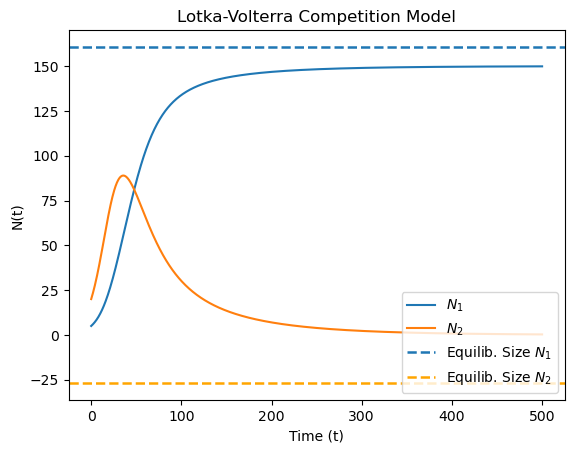

In [9]:
# Set initial condtions 
alpha, N, r, K = set_initial_conditions(0.4, 1.1)

# Set the duration of the model
t = set_timesteps(500)

# Solve the ode
solution = ode_solution(LV_competition, N, t, r, K, alpha)

# Make a vector of equilibria
equilib_vector = get_equilib_vector([solved_for_N[N1], solved_for_N[N2]], K, K1, K2, alpha, a12, a21)

# Plot the ode results
plot_ODE_results(t, solution, equilib_vector, "abundance_over_time")


From the above figure, we can conclude that, given the initial conditions selected earlier, $N_1$ will eventually approach its carrying capacity, while $N_2$ will become extinct. Coexistance under these initial conditions requires an $N_1$ population size of $\approx{160}$, and an $N_2$ population size of $\approx{-25}$, which is an impossibility. 

To more precisely examine the behaviour of this system, we will proceed to study the phase diagram.

***

<font size='7'> <b>2. Phase Diagrams </b></font> 

Phase diagrams allow us to examine the stationary points and the trajectories of the solutions as vectors, as well as the <b>nullclines</b> - trajectories where the derivative of one of the population sizes is zero, thus providing the expected equilibrium size of one population if the other is held constant.

To elabourate, for N1 and N2, the nullclines will be at: 

$ N_1=0 $ </br>
$ K_1−N_1-\alpha_{12}N_2 $ </br>
and;
$ N_2=0 $ </br>
$ K_2−N_2-\alpha_{21}N_1 $ </br>

which, on a plot of populations $N_1$ / $N_2$, would be the horizontal line $N_1=0$ and a straight line $K_1−N_1−\alpha{12}N_2=0$.

By plotting the derivative of points either side of the nullcline for each population, we can obtain a visual representation of the vector fields of the phase diagram, with respect to the carrying capacities $K_1$ and $K_2$. When the derivative of a point in phase space is zero, the population is at equilibrium. Note that positive indicates a tendancy to increase, and negative indicates a tendancy to decrease. 

In [15]:
def plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N1_0, N2_0):
    plt.quiver(xx, yy, NN1/norm, NN2/norm, cmap=plt.cm.gray) 
    plt.plot(N_1, null_N1)
    plt.plot(N_1, null_N2)
    plt.plot(solution[:, 0], solution[:, 1], color = "red", ls='dashdot', lw='3')
    plt.xlim(0, N1_max)
    plt.ylim(0, N2_max)
    plt.title( r'Phase Diagram: $\alpha_{12}=$%s,  $\alpha_{21}=$%s' % (float('%.2g' % alpha[0]), float('%.2g' % alpha[1])) )
    plt.xlabel("Pop. $N_1$")
    plt.ylabel("Pop. $N_2$")
    plt.legend(['nullcline $N_1$', 'nullcline $N_2$', f"$N_1(0)$={N1_0}, $N_2(0)$={N2_0}"], loc='upper right', framealpha=1)
    plt.show()

In [16]:
def get_interval(K, alpha):
    return (
        np.linspace(0, np.max([K[0], K[1]/alpha[1]])+20, 1000), 
        np.linspace(0, np.max([K[1], K[0]/alpha[0]])+20, 1000)
    )
    
    
def get_nullclines(K, alpha, N_1):
    return (
        (K[0] - N_1)/alpha[0],
        (K[1] - alpha[1] * N_1)
    )
    
    
def get_max(N_1, N_2):
    return np.max(N_1), np.max(N_2)


def get_vectors(N1_max, N2_max, num_vec_vals):
    return (
        np.linspace(0.1, N1_max, num_vec_vals),
        np.linspace(0.1, N2_max, num_vec_vals)
    )
    
    
def get_meshgrid(N1_max, N2_max, num_vec_vals):
    x, y = get_vectors(N1_max, N2_max, num_vec_vals)
    return np.meshgrid(x, y)


def create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals):
    N1_max, N2_max = get_max(N_1, N_2)
    xx, yy = get_meshgrid(N1_max, N2_max, num_vec_vals)
    NN1, NN2 = LV_competition((xx, yy), 0, r, K, alpha)
    return (
        xx, yy, NN1, NN2, np.sqrt(NN1**2 + NN2**2)
    )
    
    
def get_plot_data(K, alpha):
    N_1, N_2 = get_interval(K, alpha)
    null_N1, null_N2 = get_nullclines(K, alpha, N_1)
    N1_max, N2_max = get_max(N_1, N_2)
    return (
        N_1, N_2, null_N1, null_N2, N1_max, N2_max
    )

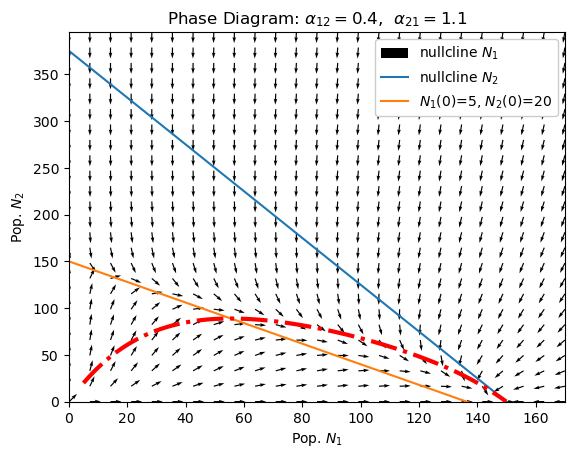

In [17]:
# Get plot data 
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 

# Create vector field 
num_vec_vals = 25
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)

# plot phase diagram
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])

The above is a phase diagram of L-V competition, plotted according to our initial conditions, with a solution for the previously defined initial population sizes for $N_1$ and $N_2$ $(N_1(0)=5$, $N_2(0)=20)$ given by the red dotdash line. Where the blue nullcline intersects the $x$ axis is the carrying capacity $K_1=150$ for $N_1$ and where the orange nullcline intersects the $y$ axis is the carrying capacity $K_2=150$ for $N_2$.

***
<font size='7'> <b>3. Stability Analysis </b></font>

We can see that the vectors collectively point toward the region in the phase plane at the lower right, where the blue nullcline of $N_1$ intersects the $x$ axis. Thus, the equilibrium of the system tends toward $N_1$ existing at its full carrying capacity, implying that $N_2$ is locally extinct.

At this point, it's worth examining different configurations of intitial conditions. Specifically, we will vary the coefficients of competition $\alpha{12}$ and $\alpha{21}$ and repeat the previous two steps, to create a series of case studies. The results will then be analysed from the perspective of interpreting the stability of the two species Lotka-Volterra system at equilibrium. 

For each of the following Case Studies, we will retain the arbitrary default values, previously defined, for the following:

$N_1=5$ <br>
$N_2=20$ <br> 
$r_1=0.1$ <br> 
$r_2=0.1$  <br>
$K_1=150$ <br> 
$K_2=150$ <br>
$$
\begin{aligned}
& \text {Table 1: Varying Competition Coefficients }\\
&\begin{array}{ccccc}
\hline \hline \text { alpha } & \text { Case 1 } & \text { Case 2  } & \text { Case 3  } & \text { Case 4 } \\
\hline \alpha_{12} & 0.4 & 1.5 & 1.3 & 0.65 \\
\alpha_{21} & 1.1 & 0.8 & 1.6 & 0.5 \\
\hline
\end{array}
\end{aligned}
$$

## <b><i> Case Studies </i></b>

In [13]:
# We set the number of timesteps and vector values equal for all case studies 
t = set_timesteps(500)
num_vec_vals = 25

## <b><i> Case 1 </i></b>

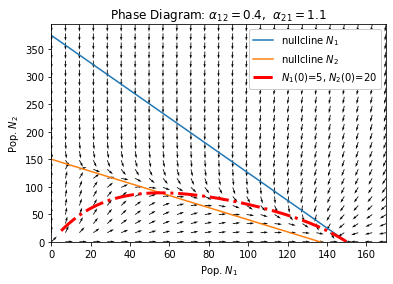

In [14]:
# CASE 1 
alpha, N, r, K = set_initial_conditions(0.4, 1.1)
solution = ode_solution(LV_competition, N, t, r, K, alpha)

# CASE 1 PHASE DIAGRAM
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])

For Case 1 $(\alpha_{12}=0.4, \alpha_{21}=1.1)$, $N_1$'s nullcline is above and to the right of  $N_2$'s. For any combination of species abundances in the bottom left of the plot, both populations should be expected to tend toward an increase at equilibrium. Similarly, both species are above their respective nullclines for any combination of abundances iin the top right of the plot in the top right corner of the graph, so both should be expected to decrease. Finally, for any combination of abundances between the nullclines, $N_1$ is below its nullcline, and should increase, while $N_2$ is above its nullcline, and should decrease. 

However, the net movement indicated by the vector arrows, is toward the bottom right of the plot. The comparitively greater competitive pressure exerted by S$N_1$ on $N_2$ (i.e. $\alpha_{21}$ > $\alpha_{12}$), strongly influences $N_2$'s survival likelihood. Although $N_2$ has greater numbers of individuals in the population to begin with, $N_1$'s superior competitive advantage eventually drives $N_2$ out of the niche, whether by niche partitioning, or by local extinction, with $N_1$ tending toward its carrying capacity, $K_1$.

## <b><i> Case 2 </i></b>

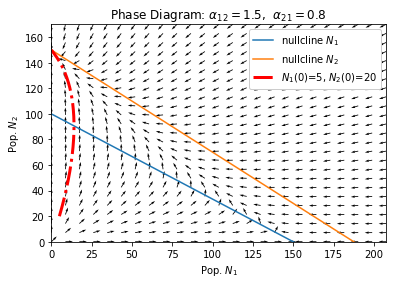

In [15]:
alpha, N, r, K = set_initial_conditions(1.5, 0.8)
solution = ode_solution(LV_competition, N, t, r, K, alpha)
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])

Case 2 $(\alpha_{12}=1.5, \alpha_{21}=0.8)$ shows effectively the opposite behaviour to Case 1. Here, ( $\alpha_{12}$ > $\alpha_{21}$ ), driving the vectors and the specific solution for $N_1(0)=5,N_2(0)=20$ given in red, toward the $K_2$ carrying capacity, indicating that $N_2$ is the stronger competitor. Thus, $N_1$ faces competitive exclusion, by being driven out of the niche, or by local extinction.

## <b><i> Case 3 </i></b>

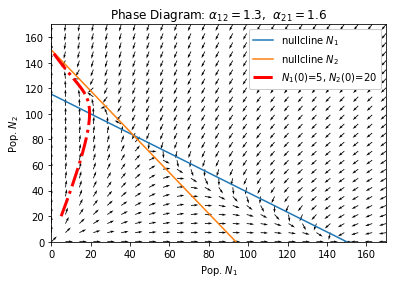

In [16]:
alpha, N, r, K = set_initial_conditions(1.3, 1.6)
solution = ode_solution(LV_competition, N, t, r, K, alpha)

# CASE 3 PHASE DIAGRAM
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])

Case 3 $(\alpha_{12}=1.3, \alpha_{21}=1.6)$ shows a more complex behaviour. In the context of the L-V competitive model, species are considered to be 'strong' competitors when $\alpha > 1.5$. In this case, both $N_1$ and $N_2$ are 'strong' competitors. We can observe that $K_1$ > $K_2/\alpha{21}$ (i.e. where nullcline $N_2$ intersects the $x$ axis) and $K_2$ > $K_1/\alpha{12}$. Any combination of abundances in the top right and bottom left of the plot imply a tendancy to increase or decrease similarly to the previous cases. However, any combination of abundances to the right of where nullclines of the two species intersect, and between the two nullclines, will tend toward an equilibrium at the $K_1$ carrying capacity, implying that $N_1$ has competitively excluded $N_2$. Meanwhile, the opposite behaviour is true for any combination of abundances to the left of where nullclines of the two species intersect, and between the two nullclines. In this case, the system will tend toward an equilibrium at the $K_2$ carrying capacity, implying that $N_2$ has competitively excluded $N_1$

This is known as an unstable equilibrium point, and the final equilibrium configuration of the system is a function of the initial abundances of each species. To demonstrate, we will run the same analysis, with all variables kept the same, but with $N_1=5$ and $N_2=5$.

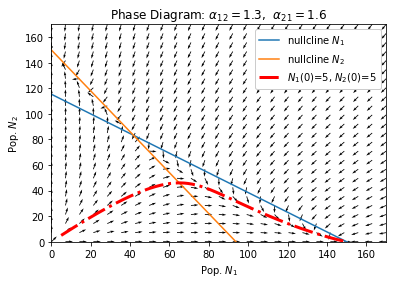

In [17]:
alpha, N, r, K = set_initial_conditions(1.3, 1.6, N1=5, N2=5)
solution = ode_solution(LV_competition, N, t, r, K, alpha)

# CASE 3 - EXAMPLE 2 - PHASE DIAGRAM
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])

## <b><i> Case 4 </i></b>

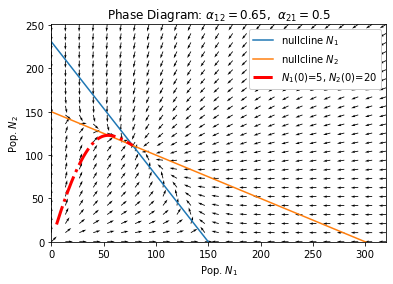

In [18]:
alpha, N, r, K = set_initial_conditions(0.65, 0.5)
solution = ode_solution(LV_competition, N, t, r, K, alpha)

# CASE 4 PHASE DIAGRAM
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])

Finally, Case 4 $(\alpha_{12}=0.65, \alpha_{21}=0.5)$ exemplifies a scenario where both $N_1$ and $N_2$ are 'weak' competitors. Like Case 3, the nullclines intersect, except here $K_1$ < $K_2/\alpha{21}$ and $K_2$ < $K_1/\alpha{12}$. Case 4 further diverges from the previous in that the trajectories to the right and left of where the nullclines intersect, and between the two nullclines, both tend inward toward the intersection point, indicating a stable equilibrium point thatt persists, regardless of the initial abundances.

The interpretation of this outcome invokes a scenario whereby intraspecific competition between individuals of the same species has a greater effect on population numbers than interspecific competition between members of different species competing within the same niche. 

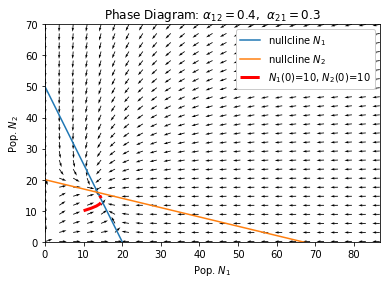

In [31]:
alpha, N, r, K = set_initial_conditions(a12=0.4, a21=0.3, N1=10, N2=10, r1=1.5, r2=0.5, K1=20, K2=20)
solution = ode_solution(LV_competition, N, t, r, K, alpha)

# CASE 4 PHASE DIAGRAM
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])



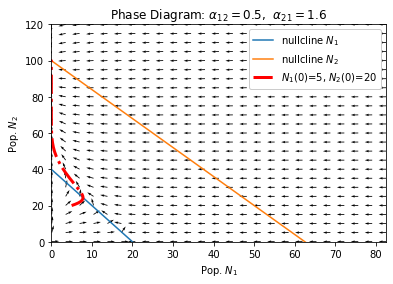

In [23]:
# CASE 4 PHASE DIAGRAM
N_1, N_2, null_N1, null_N2, N1_max, N2_max = get_plot_data(K, alpha) 
xx, yy, NN1, NN2, norm = create_vector_field(N_1, N_2, r, K, alpha, num_vec_vals)
plot_phase_diagram(xx, yy, NN1, NN2, norm, N_1, null_N1, null_N2, N1_max, N2_max, solution, alpha, N[0], N[1])
